In [1]:
import cv2
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt
import imutils
import glob
import h5py
from PIL import Image, ImageEnhance

In [44]:
img = cv2.imread('depth2.jpg')
cv2.imshow('saturated', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
img2 = img.copy()

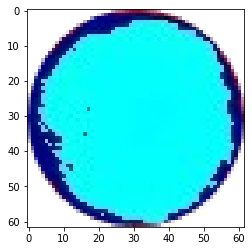

In [17]:
#make template image
#template = cv2.imread('/home/alissa/Desktop/circle-cropped.png')
template = Image.open('/home/alissa/Desktop/circle-cropped.png')
plt.imshow(template)

converter = ImageEnhance.Color(template)
for scale in np.linspace(0.2,4.0,10)[::-1]:
    saturated = converter.enhance(scale) 
    saturated = np.array(saturated)
    saturated = cv2.cvtColor(saturated, cv2.COLOR_BGR2GRAY)
    cv2.imshow('saturated', saturated)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
np.linspace(0.2,4.0,10)

array([0.2       , 0.62222222, 1.04444444, 1.46666667, 1.88888889,
       2.31111111, 2.73333333, 3.15555556, 3.57777778, 4.        ])

['depth1crop3.jpg', 'depth1crop1.jpg', 'depth1crop2.jpg', 'depth1crop4.jpg']
max value at point (68953360.0, (320, 168))


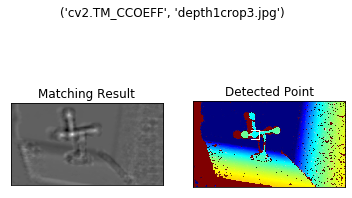

max value at point (69448352.0, (262, 163))


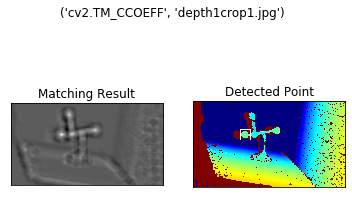

max value at point (75438600.0, (301, 62))


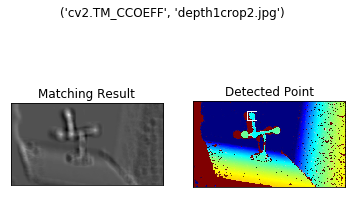

max value at point (62836612.0, (436, 142))


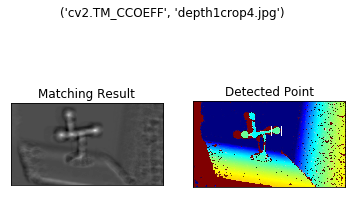

['depth2crop3.jpg', 'depth2crop4.jpg', 'depth2crop2.jpg', 'depth2crop1.jpg']
max value at point (50012868.0, (441, 174))


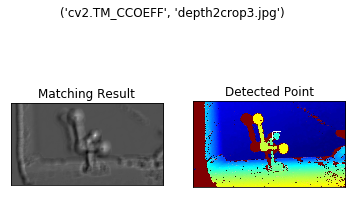

max value at point (186529760.0, (465, 230))


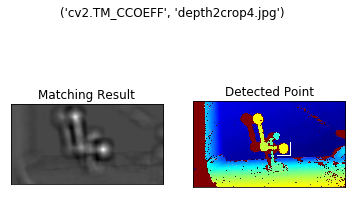

max value at point (77135872.0, (364, 229))


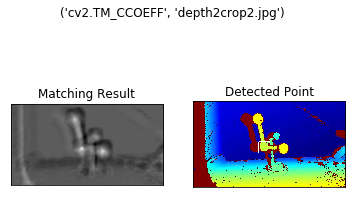

max value at point (166296272.0, (325, 69))


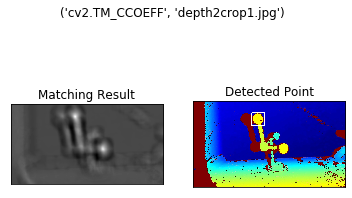

In [57]:
#second camera
images = ['depth1.jpg','depth2.jpg']
temp = ['depth1crop*','depth2crop*']
ball_location = []
for x in range(len(images)):
    img = cv2.imread(images[x])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    method = ('cv2.TM_CCOEFF')
    templates = glob.glob(temp[x])
    print(templates)
    for t in templates:
        img2 = img.copy()
        template = cv2.imread(t)
        w, h = template.shape[:2]
        res = cv2.matchTemplate(img2, template, eval(method))
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        print('max value at point', (max_val, max_loc))
        #print('min value at point', (min_val, min_loc))
        top_left = max_loc
        bottom_right = (top_left[0] +w, top_left[1]+h)
        midpoint = (np.round(bottom_right[0]+top_left[0])/2, np.round(bottom_right[1]+top_left[1])/2)
        ball_location.append(midpoint)

        cv2.rectangle(img2,top_left, bottom_right, (255,255,255),2)

        plt.subplot(121), plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122), plt.imshow(img2, cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle((method,t))
        plt.show()

In [59]:
ball_location

[(344.0, 192.0),
 (290.0, 191.0),
 (327.0, 88.0),
 (463.5, 169.5),
 (464.5, 197.5),
 (503.0, 268.0),
 (395.5, 260.5),
 (361.0, 105.0)]

In [54]:
hf = h5py.File('xyzdepth1.h5','r')
hf.keys()
hf2 = h5py.File('xyzdepth2.h5','r')
hf2.keys()

<KeysViewHDF5 ['dataset_1']>

In [55]:
xyzdata1 = hf.get('dataset_1')
xyzdata1 = np.array(xyzdata1)
xyzdata2 = hf2.get('dataset_1')
xyzdata2 = np.array(xyzdata2)

In [56]:
xyzdata1[ball_location[4]]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [51]:
xyz_loc1 = np.ndarray(shape = (4,3), dtype = float, order='F')
for i in range(4):
    xyz_loc1[i] = xyzdata1[ball_location[i]]
    print(ball_location[i])
print(xyz_loc1)


xyz_loc2 = np.ndarray(shape = (4,3), dtype = float, order='F')
for i in range(4):
    xyz_loc2[i] = xyzdata2[ball_location[i+3]]
    print(ball_location[i+3])
print(xyz_loc2)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [42]:
#center of mass
np.average(xyz_loc1, axis = 0)*100

array([-17.95290574, -19.3593666 ,  78.82500291])

In [43]:
#center of mass
np.average(xyz_loc2, axis =0)*100

array([ 0.75428602, -6.33955055, 55.90000153])

In [44]:
print(LA.norm((xyz_loc1[0] - xyz_loc1[1]),2)*100)
print(LA.norm((xyz_loc1[1] - xyz_loc1[2]),2)*100)
print(LA.norm((xyz_loc1[2] - xyz_loc1[3]),2)*100)
print(LA.norm((xyz_loc1[0] - xyz_loc1[3]),2)*100)
print(LA.norm((xyz_loc1[0] - xyz_loc1[2]),2)*100)
print(LA.norm((xyz_loc1[1] - xyz_loc1[3]),2)*100)

12.12710930352294
24.906606492555884
37.11112335318107
27.08806909125485
22.13742921348793
31.356217932065928


In [45]:
print(LA.norm((xyz_loc2[0] - xyz_loc2[1]),2)*100)
print(LA.norm((xyz_loc2[1] - xyz_loc2[2]),2)*100)
print(LA.norm((xyz_loc2[2] - xyz_loc2[3]),2)*100)
print(LA.norm((xyz_loc2[0] - xyz_loc2[3]),2)*100)
print(LA.norm((xyz_loc2[0] - xyz_loc2[2]),2)*100)
print(LA.norm((xyz_loc2[1] - xyz_loc2[3]),2)*100)

4.845679555919512
8.37237451673036
13.63673259104183
15.258766942904876
13.137777790753205
12.601075042663584


In [11]:
#from PIL import Image
#multiscale template matching 
#loop over the scales of the template
img = cv2.imread('depth2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

template = cv2.imread('/home/alissa/Desktop/circle-cropped.png')
gtemplate = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
cv2.imshow('template', template)
w,h  = template.shape[:2]


template1 = Image.open('/home/alissa/Desktop/circle-cropped.png')
converter = ImageEnhance.Color(template1)
i = 1
for scale in np.linspace(0.2,2.0,40)[::-1]:
    #resize the template according to the scale and keep track of ratio of resizing
    #print('scale',scale)
    #print(i)
    resized = imutils.resize(gtemplate, width = int(template.shape[1]*scale))
    cv2.imshow('resized',resized)
    r = template.shape[1]/float(resized.shape[1])

    #saturated = converter.enhance(scale) 
    #saturated = np.array(saturated)
    #saturated = cv2.cvtColor(saturated, cv2.COLOR_BGR2GRAY)
    #cv2.imshow('saturated', saturated)
    
    #match based on changing sizes
    result = cv2.matchTemplate(gray, resized, cv2.TM_SQDIFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    print([min_loc, max_loc])
    #match based on changing saturations
    #result = cv2.matchTemplate(gray, saturated, cv2.TM_SQDIFF_NORMED)
    #min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    #resize the origmal image after finding one ball to look for pixels within (200,200)
    '''roi = gray[min_loc[0]:min_loc[0]+w, min_loc[1]:min_loc[1]+h]
    cv2.matchTemplate(roi, resized, cv2.TM_SQDIFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)'''
    
    
    #visualize iteration
    img2 = gray.copy()
    top_left = min_loc
    bottom_right = (top_left[0]+w, top_left[1]+h)
    cv2.rectangle(img2, top_left, bottom_right, (255,255,255),2)
    cv2.imshow('Visualize',img2)
    cv2.waitKey(0)
    i = i+1
    
cv2.destroyAllWindows()

[(66, 309), (161, 0)]
[(66, 310), (169, 0)]
[(66, 311), (173, 0)]
[(47, 47), (177, 0)]
[(48, 55), (182, 0)]
[(48, 57), (186, 0)]
[(49, 59), (191, 0)]
[(50, 71), (0, 0)]
[(50, 72), (0, 0)]
[(50, 72), (0, 0)]
[(51, 68), (0, 0)]
[(52, 71), (0, 0)]
[(53, 73), (0, 0)]
[(53, 75), (0, 0)]
[(53, 77), (0, 0)]
[(326, 68), (0, 0)]
[(327, 67), (0, 0)]
[(327, 68), (0, 0)]
[(327, 69), (0, 0)]
[(325, 70), (0, 0)]
[(468, 236), (0, 0)]
[(469, 236), (0, 0)]
[(471, 238), (0, 0)]
[(473, 238), (0, 0)]
[(475, 238), (0, 0)]
[(367, 234), (0, 0)]
[(368, 236), (0, 0)]
[(369, 240), (0, 0)]
[(441, 177), (0, 0)]
[(442, 177), (0, 0)]
[(444, 178), (0, 0)]
[(358, 147), (0, 0)]
[(360, 151), (0, 0)]
[(362, 155), (0, 0)]
[(423, 250), (0, 0)]
[(425, 251), (0, 0)]
[(448, 253), (0, 0)]
[(450, 254), (0, 0)]
[(412, 358), (0, 0)]
[(700, 331), (0, 0)]


In [ ]:
img = cv2.imread('depth2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

template = cv2.imread('/home/alissa/Desktop/circle-cropped.png')
gtemplate = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
cv2.imshow('template', template)
w,h  = template.shape[:2]

min_loc = (320,60)
for scale in np.linspace(0.2,2.0,40)[::-1]:
    #resize the template according to the scale and keep track of ratio of resizing
    #print('scale',scale)
    #print(i)
    resized = imutils.resize(gtemplate, width = int(template.shape[1]*scale))
    cv2.imshow('resized',resized)
    r = template.shape[1]/float(resized.shape[1])
    
    #resize the origmal image after finding one ball to look for pixels within (200,200)
    roi = gray[min_loc[0]-100:min_loc[0]+100, min_loc[1]-100:min_loc[1]+100]
    cv2.matchTemplate(roi, resized, cv2.TM_SQDIFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    img2 = roi.copy()
    top_left = min_loc
    bottom_right = (top_left[0]+w, top_left[1]+h)
    cv2.rectangle(img2, top_left, bottom_right, (255,255,255),2)
    cv2.imshow('Visualize',img2)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
min_loc = (251,184)
x = min_loc[0]
y = min_loc[1]

In [32]:
print(y+100)
print(y-100)

284
84


In [41]:
img = cv2.imread('depth2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = gray[40:350, x-50:x+400]


template = cv2.imread('/home/alissa/Desktop/circle-cropped.png')
gtemplate = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
w,h  = template.shape[:2]


for scale in np.linspace(0.2,2.0,40)[::-1]:
    #resize the template according to the scale and keep track of ratio of resizing
    #print('scale',scale)
    #print(i)
    resized = imutils.resize(gtemplate, width = int(template.shape[1]*scale))
    cv2.imshow('resized',resized)
    r = template.shape[1]/float(resized.shape[1])
    cv2.matchTemplate(img2, resized, cv2.TM_SQDIFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    img3 = img2.copy()
    top_left = min_loc
    bottom_right = (top_left[0]+w, top_left[1]+h)
    cv2.rectangle(img3, top_left, bottom_right, (255,255,255),2)
    cv2.imshow('Visualize',img2)
    cv2.waitKey(0)
cv2.destroyAllWindows()

max value at point (92628880.0, (326, 358))
min value at point (-30969204.0, (532, 323))


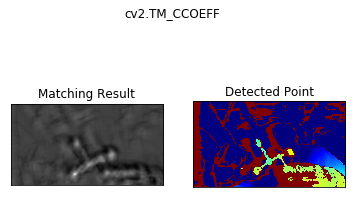

max value at point (0.9964555501937866, (326, 358))
min value at point (-0.37478625774383545, (731, 394))


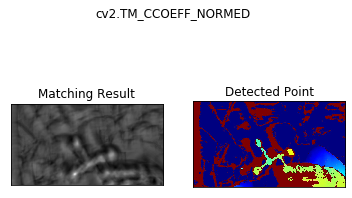

max value at point (205295232.0, (780, 412))
min value at point (30650694.0, (208, 302))


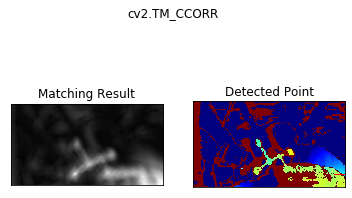

max value at point (0.9983361959457397, (326, 358))
min value at point (0.2481631636619568, (308, 179))


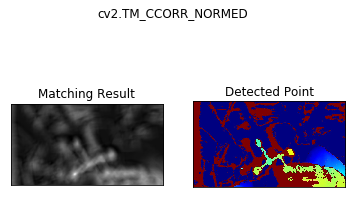

max value at point (338448288.0, (673, 298))
min value at point (685577.0, (326, 358))


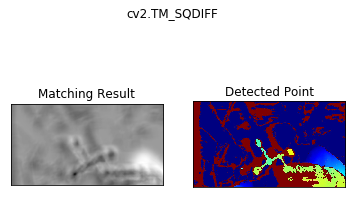

max value at point (1.0, (0, 0))
min value at point (0.003338211914524436, (326, 358))


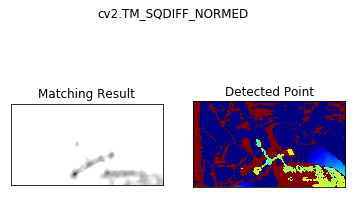

In [6]:
#all the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    #apply template matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print('max value at point', (max_val, max_loc))
    print('min value at point', (min_val, min_loc))
    
    #if TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] +w, top_left[1]+h)
    
    cv2.rectangle(img,top_left, bottom_right, 255,2)
    
    plt.subplot(121), plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img, cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()